In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


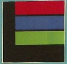

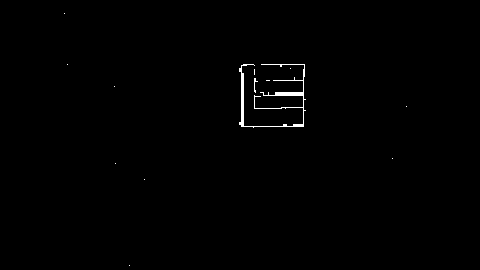

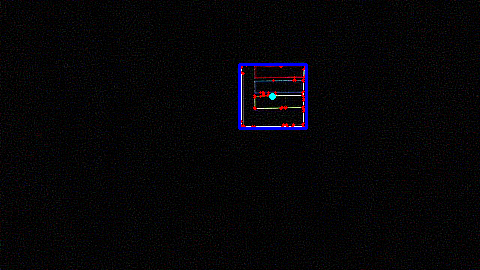

KeyboardInterrupt: ignored

In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

imPath = os.walk('/content/drive/My Drive/nto/2st/images')
for i in imPath:
    imPath = i[2]
i = 0
w = 0
while i < 20:
  if w  == 0:
    w = 1
    frame = cv2.imread('/content/drive/My Drive/nto/2st/images/' + imPath[i])
    filter = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]], dtype=np.float32)
    img = cv2.resize(frame, (480, 270))
    imgfl = cv2.filter2D(img, -1, filter) #delta=100)
    binimg = cv2.inRange(imgfl, (35, 35, 35), (255, 255, 255))
    # binimg = cv2.erode(binimg, None, iterations=1)
    binimg = cv2.dilate(binimg, None, iterations=1)
    binimg = cv2.erode(binimg, None, iterations=1)
    #binimg = cv2.inRange(binimg, 0, 0)
    contours, _ = cv2.findContours(binimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    kubs = 0
    lines = []
    x_coordinates = []
    y_coordinates = []
    cv2.drawContours(imgfl, contours[0], -1, (0, 0, 255), 2)
    for j in range(len(contours)):
        # cv2.drawContours(img, contours, j, (0, 0, 255), 2)
        (x, y, w, h) = cv2.boundingRect(contours[j])
        if w > 40 and h > 40 and w-h <= 10:
            kubs += 1
            #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            marker = img[y:y + h, x:x + w]

            cv2.drawContours(imgfl, contours[j], 0, (0, 0, 255), 2)
            same = False
            cv2.circle(imgfl, ((x + w // 2), (y + h // 2)), 2, (255, 255, 0), 2)
            for ii in range(len(x_coordinates)):
                if abs((x + w // 2) - x_coordinates[ii]) < 10 and abs((y + h // 2) - y_coordinates[ii]) < 10:
                    same = True
                    break
            if not same:
                kubs += 1
                x_coordinates.append(x + w // 2)
                y_coordinates.append(y + h // 2)
                cv2.rectangle(imgfl, (x, y), (x + w, y + h), (255, 0, 0), 2)
                marker_r = cv2.inRange(marker, (0, 0, 150), (100, 100, 255))
                marker_r = cv2.inRange(marker, (0, 0, 150), (100, 100, 255))
                cv2_imshow(marker)
    cv2_imshow(binimg)
    cv2_imshow(imgfl)
    key = cv2.waitKey(1)
  if key == ord('n'):
      cv2.destroyAllWindows()
      w = 0
      i += 1
  if key == ord('q'):
      cv2.destroyAllWindows()
      break